Training completed in 0.1894 seconds
Mean Squared Error: 0.004409


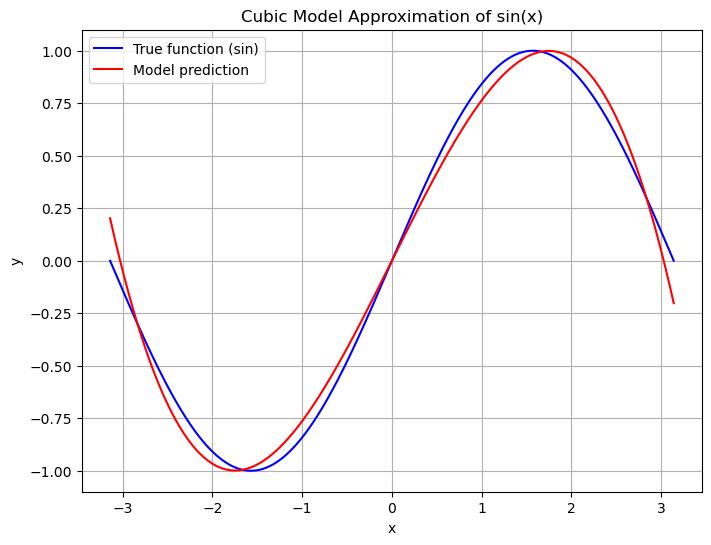

In [22]:
import numpy as np
import math
import time

x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6

start_time =time.time()
for t in range(5000):

    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = np.square(y_pred - y).sum()

    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

    

y_pred = a + b * x + c * x ** 2 + d * x ** 3
end_time = time.time()
duration = end_time - start_time
print(f"Training completed in {duration:.4f} seconds")
mse = ((y_pred - y) ** 2).mean()
print(f"Mean Squared Error: {mse:.6f}")

# Plot the final result
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='True function (sin)', color='blue')
plt.plot(x, y_pred, label='Model prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Model Approximation of sin(x)')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
import torch

device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

x = torch.linspace(-math.pi, math.pi, 2000, device=device)
y = torch.sin(x)

a = torch.randn((), device=device)
b = torch.randn((), device=device)
c = torch.randn((), device=device)
d = torch.randn((), device=device)

start_time=time.time()
learning_rate = 1e-6
for t in range(5000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum().item()
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
end_time = time.time()
duration = end_time - start_time
print(f"Training completed in {duration:.4f} seconds")

mse = ((y_pred - y) ** 2).mean()
print(f"Mean Squared Error: {mse:.6f}")


Training completed in 0.1859 seconds
Mean Squared Error: 0.004409


In [65]:
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

x = torch.linspace(-math.pi, math.pi, 2000, device=device)
y = torch.sin(x)

a = torch.randn((), device=device, requires_grad=True)
b = torch.randn((), device=device, requires_grad=True)
c = torch.randn((), device=device, requires_grad=True)
d = torch.randn((), device=device, requires_grad=True)

learning_rate = 1e-6
start_time=time.time()
for t in range(5000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    loss = (y_pred - y).pow(2).sum()
    loss.backward()
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

end_time = time.time()
duration = end_time - start_time
print(f"Training completed in {duration:.4f} seconds")

mse = ((y_pred - y) ** 2).mean()
print(f"Mean Squared Error: {mse:.6f}")


Training completed in 0.3354 seconds
Mean Squared Error: 0.004409


Training completed in 0.3092 seconds
Mean Squared Error: 0.004428


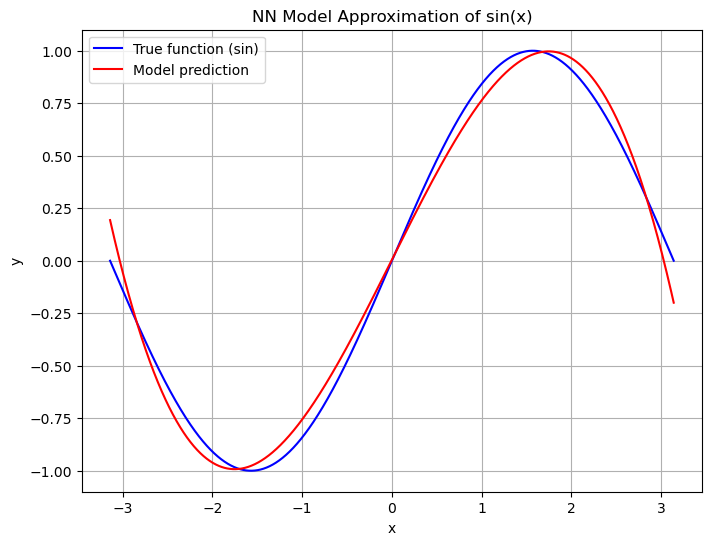

In [66]:
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

x = torch.linspace(-math.pi, math.pi, 2000, device=device)
y = torch.sin(x)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).to(device)
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
start_time=time.time()
for t in range(5000):
    y_pred = model(xx)

    loss = loss_fn(y_pred, y)
    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            
end_time = time.time()
duration = end_time - start_time
print(f"Training completed in {duration:.4f} seconds")

mse = ((y_pred - y) ** 2).mean()
print(f"Mean Squared Error: {mse:.6f}")

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='True function (sin)', color='blue')
plt.plot(x, y_pred.detach(), label='Model prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('NN Model Approximation of sin(x)')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

x = torch.linspace(-math.pi, math.pi, 2000, device=device)
y = torch.sin(x)

p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(5000):
    y_pred = model(xx)

    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()


mse = ((y_pred - y) ** 2).mean()
print(f"Mean Squared Error: {mse:.6f}")


Mean Squared Error: 0.004460


Training completed in 1.1186 seconds
Mean Squared Error: 0.000064


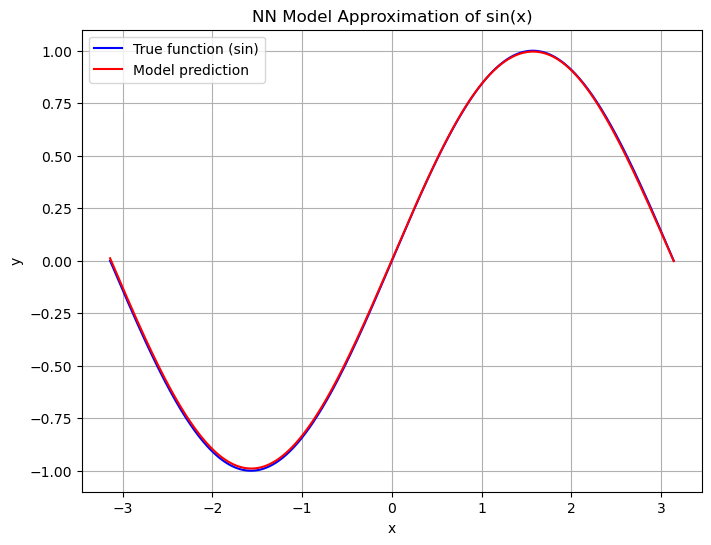

In [77]:
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

x = torch.linspace(-math.pi, math.pi, 2000, device=device).unsqueeze(1)
y = torch.sin(x)

model = torch.nn.Sequential(
    torch.nn.Linear(1, 50),
    torch.nn.Tanh(),
    torch.nn.Linear(50, 1)
).to(device)

# Loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 2000
start_time = time.time()

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

end_time = time.time()
duration = end_time - start_time
print(f"Training completed in {duration:.4f} seconds")

# Final prediction
y_pred = model(x)


mse = ((y_pred - y) ** 2).mean()
print(f"Mean Squared Error: {mse:.6f}")
plt.figure(figsize=(8, 6))
#plt.plot(x, y, label='True function (sin)', color='blue')
plt.plot(x, y, label='True function (sin)', color='blue')
plt.plot(x, y_pred.detach(), label='Model prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('NN Model Approximation of sin(x)')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
# pip install pandas
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# pip install scikit-learn
from sklearn.model_selection import train_test_split

# Data from the image
data = {
    'Temporal order of flight': list(range(1, 24)),
    'Launch temperature (degrees F)': [66, 70, 69, 68, 67, 72, 73, 70, 57, 63, 70, 78, 67, 53, 67, 75, 70, 81, 76, 79, 75, 76, 58],
    'Leak-check pressure (psi)': [50, 50, 50, 50, 50, 100, 100, 100, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200],
    'target_variable': [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1]
}

# Create the DataFrame
df = pd.DataFrame(data)



In [2]:
df

,Temporal order of flight,Launch temperature (degrees F),Leak-check pressure (psi),target_variable
0,1,66,50,0
1,2,70,50,1
2,3,69,50,0
3,4,68,50,0
4,5,67,50,0
5,6,72,100,0
6,7,73,100,0
7,8,70,100,0
8,9,57,200,1
9,10,63,200,1


In [4]:
X = torch.tensor(df[['Launch temperature (degrees F)', 'Leak-check pressure (psi)', 'Temporal order of flight']].values).float()
y = torch.tensor(df['target_variable'].values).float()  # Replace 'target_variable' with the actual column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# further split to validation
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# train : val : test = 8:1：1

# Create TensorDatasets for training and testing
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# Create DataLoaders for training and testing
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False)

# Define the neural network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 2)  # 3 input features, 2 outputs for the hidden layer
        self.fc2 = nn.Linear(2, 1)  # 1 output feature

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation function
        x = self.fc2(x)
        return x

# Initialize the network
net = Net()

# Define the loss function and the optimizer
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(net.parameters(), lr=0.01)  # Stochastic Gradient Descent Optimizer

# Training the network
for epoch in range(20):  # Loop over the dataset multiple times
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        
        # Calculate loss
        loss = criterion(outputs, labels.unsqueeze(1))  # Use unsqueeze to match the output shape
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    
    # Print loss every 10 epochs
    print(f'Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}')

print('Finished Training')

# Test the network on the test data
net.eval()  # Set the net to evaluation mode
with torch.no_grad():  # Gradient tracking turned off
    test_loss = 0.0
    for inputs, labels in test_loader:
        outputs = net(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        test_loss += loss.item()
    
print(f'Test Loss: {test_loss / len(test_loader)}')

Epoch 1, Loss: 331.48008239269257
Epoch 2, Loss: 2.6558118224143983
Epoch 3, Loss: 2.287444019317627
Epoch 4, Loss: 1.9889887750148774
Epoch 5, Loss: 1.7429544389247895
Epoch 6, Loss: 1.5434799134731292
Epoch 7, Loss: 1.4693670392036438
Epoch 8, Loss: 1.3190575152635575
Epoch 9, Loss: 1.119741603732109
Epoch 10, Loss: 1.0332794442772866
Epoch 11, Loss: 1.1904696255922318
Epoch 12, Loss: 0.8937571165151894
Epoch 13, Loss: 0.8991768896579743
Epoch 14, Loss: 0.8071589080209378
Epoch 15, Loss: 0.7753479829058051
Epoch 16, Loss: 0.7521495676599443
Epoch 17, Loss: 0.7318386873230338
Epoch 18, Loss: 0.716134301200509
Epoch 19, Loss: 0.7356266763061285
Epoch 20, Loss: 0.6887833662331104
Finished Training
Test Loss: 0.19056649506092072


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

X = torch.tensor(df[['Launch temperature (degrees F)', 'Leak-check pressure (psi)', 'Temporal order of flight']].values).float()
y = torch.tensor(df['target_variable'].values).float()

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create TensorDatasets
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
test_data = TensorDataset(X_test, y_test)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=4, shuffle=True)
val_loader = DataLoader(val_data, batch_size=4, shuffle=False)
test_loader = DataLoader(test_data, batch_size=4, shuffle=False)

# Define the neural network structure
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the network, loss function, and optimizer
net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Early stopping parameters
patience = 5
min_val_loss = float('inf')
patience_counter = 0

# Training the network with early stopping
for epoch in range(20):
    running_loss = 0.0
    net.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation phase
    val_loss = 0.0
    net.eval()
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = net(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            val_loss += loss.item()
    val_loss /= len(val_loader)

    # Check for early stopping
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

    # Print loss every epoch
    print(f'Epoch {epoch+1}, Train Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss}')

print('Finished Training')

# Test the network on the test data
test_loss = 0.0
net.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        test_loss += loss.item()

print(f'Test Loss: {test_loss / len(test_loader)}')
